# IBM PEER GRADED ASSIGNMENT
## Statistics for Data Science with Python By IBM
#### Created by: Aya Anisa Dwinidasari - 970038
Telkom Athon #2 Data Science

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.drop(boston_df.columns[boston_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
boston_df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
LSTAT      False
MEDV       False
dtype: bool

## For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Boxplot Median value of owner-occupied homes (MEDV)')

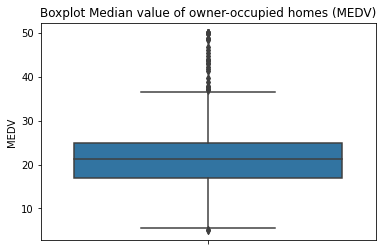

In [9]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.title("Boxplot Median value of owner-occupied homes (MEDV)")

There are outlier shown on the boxplot

## Provide a  histogram for the Charles river variable

Text(0.5, 1.0, 'Histogram for the Charles river variable (CHAS)')

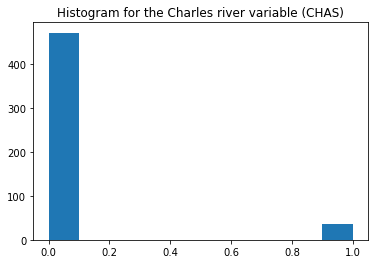

In [10]:
#sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.hist(boston_df['CHAS'])
plt.title("Histogram for the Charles river variable (CHAS)")

The histogram shown that there are many zero variable of CHAS, which means the tracts don't belong to Charles River

## Provide a boxplot for the MEDV variable vs the AGE variable.

In [11]:
## (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable')

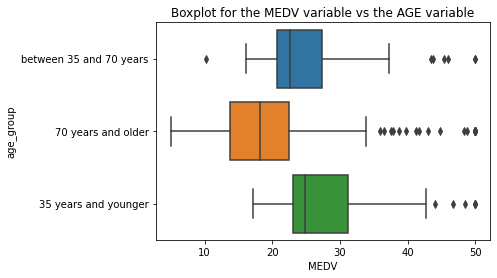

In [12]:
ax = sns.boxplot(x="MEDV", y="age_group", data=boston_df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")

There are difference MEDV house price range shown on the boxplot. It can be defined that the group age of 23 years and younger has bigger MEDV value of house price

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Scatter Plot NOx Concentration vs the proportion of non-retail business acres per town')

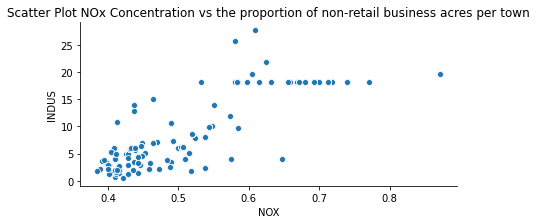

In [13]:
sns.relplot(x="NOX", y="INDUS" ,
            data=boston_df, height = 3, aspect = 2)
plt.title("Scatter Plot NOx Concentration vs the proportion of non-retail business acres per town")

After the NOX value=0.6, the INDUS tends to be constant, after it goes on an almost linear trend.

## Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')

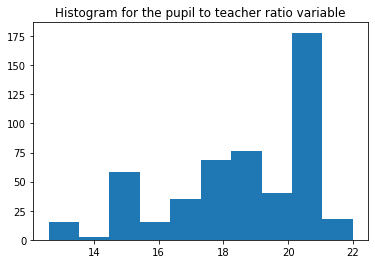

In [14]:
plt.hist(boston_df['PTRATIO'])
plt.title("Histogram for the pupil to teacher ratio variable")

Pupil to teacher ratio is highest at the range of 20 - 21

# Task 5: Use the appropriate tests to answer the questions provided.

## 5.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by the Charles river")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses bounded by the Charles river")


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

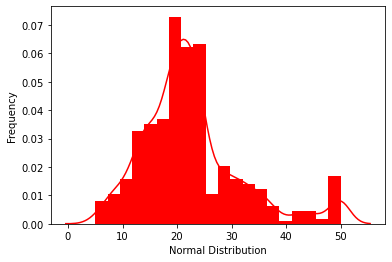

In [15]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

 We can use the Levene's Test in Python to check test significance

In [16]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

# since the p-value is less than 0.05 we can assume inequality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Use the <code>ttest_ind</code> from the <code>scipy_stats</code> library


In [17]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0] ['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river


## 5.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [18]:
boston_df["AGE"].value_counts()

100.0    43
96.0      4
98.2      4
95.4      4
97.9      4
         ..
47.6      1
92.7      1
13.9      1
58.4      1
40.1      1
Name: AGE, Length: 356, dtype: int64

In [19]:
## (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df["AGE"] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70), 'age_group'] = '70 years and older'
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


State the hypothesis

-   $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ

Test for equality of variance

In [20]:
scipy.stats.levene(boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"],
                  boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"], 
                  boston_df[boston_df["age_group"] == '70 years and older']["MEDV"], 
                   center='mean')
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

First, separate the three samples (one for each job category) into a variable each.


In [21]:
low = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]

Run the ANOVA

In [22]:
f_statistic, p_value = scipy.stats.f_oneway(low,mid,high)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


## 5.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

-   $H_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
-   $H_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot


In [23]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  NOX concentration and propotion of non retail business acres per town


## 5.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Initially, we had used the t-test to test if there was a statistical difference in evaluations for the weighted distance to the five Boston employment, we are now going to use regression. We will state the null hypothesis:

-   $H_0: β1$ = 0 (weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes)
-   $H_1: β1$ is not equal to 0 (weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes)


In [24]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.21e-08
Time:                        14:52:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
np.sqrt(0.062)

0.24899799195977465

**Conclusion:** Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in mean evaluation scores based on gender. The coefficient 1.0916 means that the distance get 0.168 values MEDV.
The R-squared 0.062 below the 1 and the square root is 0.248 (close to 0), which mean the DIS and MEDV has extremely **weak correlation.**